In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import os.path


In [88]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [89]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians


In [90]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

In [91]:
#X, y = generate_gaussians_distributions()
X, y = generate_elipse_data()

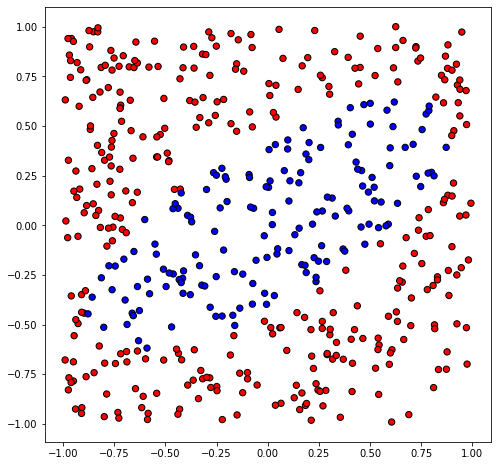

In [92]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [93]:
scoreResult = []
for i  in range(100001,100020):
    model = LogisticRegression(solver='lbfgs', C=i)
    model.fit(X, y)
    score = model.score(X,y)
    scoreResult.append(score)

print(scoreResult)

[0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682]


In [94]:
model = LogisticRegression(solver='lbfgs', C=100001)
# con  fit_intercept=False baja el accuracy con la distribucion que es linealmente separable. gaussian distro
# con  fit_intercept=False baja el accuracy con el dataset generate elipse data
# C=10 / 0.996 / gaussians_distributions
# C=100 / 0.996 / gaussians_distributions
# C=100 / 0.998 /gaussians_distributions
# C=1000 / 1 / gaussians_distributions
# C=1000 / 0.682 / generate_elipse_data()
# C=10000 / 0.682 / generate_elipse_data()
# C=1000000/ 0.682 / generate_elipse_data()

In [95]:
model.fit(X, y)

LogisticRegression(C=100001)

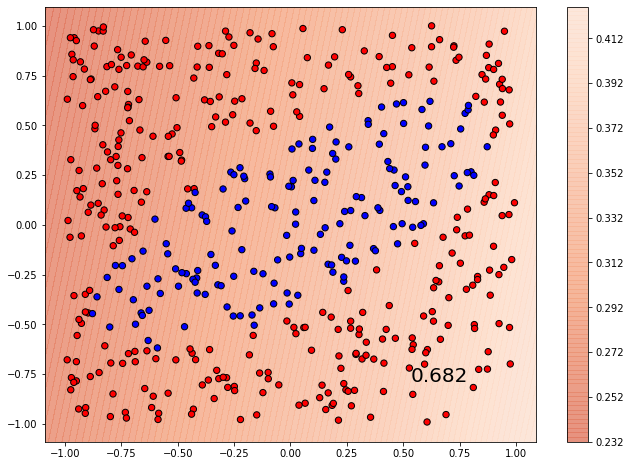

In [96]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [97]:
#  Problema 3.1
# Usar el método predict_proba para calcular la probablidad de una observación para el dataset generate_elipse_data().
# Tener en cuenta que este método espera una array de dimención (N, 2), donde 2 es la dimensión de las observaciones y N es la cantidad de observaciones cuya probabilidad quiero obtener.
# Si quiero obtener la probabilidad de una sola observación tendré que pasarle un numpy array de tamaño (2,1).
#  X1 = rojo
#  X2 = azul
x1temp = 0.5
x2temp = -0.75
Xtemp = np.array([x1temp, x2temp] ).reshape(1, 2)
model.predict_proba(Xtemp)

array([[0.62907488, 0.37092512]])

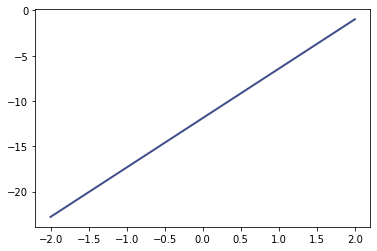

In [98]:
# Problema 3.3
x1 = np.linspace(-2, 2, 100)
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1]
plt.plot(x1, x2, color='#414e8a', linewidth=2)

In [99]:
# print(y)
# print(model.predict_proba(X))

In [109]:
# Problema 3.3
# https://www.wolframalpha.com/input/?i=graph+the+linear+function+f%28x%29+%3D+-0.3336x1+-+0.0607X2+-+0.7469
print("w1: ", model.coef_[0][1])
print("w2: ", model.coef_[0][0])
print("w0: ", model.intercept_[0])
#print(x1)
#print(x2)
print(model.coef_, model.intercept_)

w1:  -0.06284489121456066
w2:  0.3426068639558837
w0:  -0.7466871846151483
[[ 0.34260686 -0.06284489]] [-0.74668718]


In [111]:
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
w0 = model.intercept_[0]
print ("pendiente: ", -1 * w1/w2)
print ("beta: ", -1 * w0/w2)

# h = X1 * W1 - X2 * W2 - W0
# m = w1 / w2
# o = w0 / w2
#print("w1: ", model.coef_[0][1])
#print("w2: ", model.coef_[0][0])
#print("w0: ", model.intercept_[0])
# NO
# pendiente:  -0.1834315007263047
# beta:  -2.179428561335819
# NO
# pendiente:  -0.1834315007263047
# beta:  -2.179428561335819
#print("w1: ", model.coef_[0][0])
#print("w2: ", model.coef_[0][1])
#print("w0: ", model.intercept_[0])
# pendiente:  -5.451626334846839
# beta:  11.881430139895713
# pendiente:  -5.451626334846839
# beta:  11.881430139895713

pendiente:  -5.451626334846839
beta:  11.881430139895713


In [101]:
# Problema 3.4
from sklearn.metrics import log_loss
log_loss(y, model.predict_proba(X))

0.6208094584788857

In [102]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


In [103]:
# Problema 4
# Esta función calcula el promedio de las entropías cruzadas entre los valores verdaderos (y) y la estimación de las probabilidades de cada observación (Xi).
# Regresion Polinomial
# Completar la función
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X, (X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X, (X[:,0]*X[:,1]).reshape(-1, 1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X,(X[:,1]**2).reshape(-1, 1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 6ta columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1)
    return X

In [104]:
print(add_columns(X).shape)
Xprima = add_columns(X)

(500, 6)


In [105]:
#print(Xprima)
#print(X)

modelprima = LogisticRegression(solver='lbfgs', fit_intercept=False)
modelprima.fit(Xprima, y)
score = modelprima.score(Xprima,y)
print(score)
print(model.coef_, model.intercept_)
plt.figure(figsize=(11,8))
# @TODO este no funciono
#plot_boundaries(Xprima,y, score, probability_func=modelprima.predict_proba, mesh_res=500)



0.928
[[ 0.34260686 -0.06284489]] [-0.74668718]


<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>